In [8]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

# Masukkan URL video VO3 di sini
video_url = "https://youtu.be/H8B8NESbRCE?si=IQiz-sJvU1yUannt"

downloader = YoutubeCommentDownloader()
# Gunakan sort_by=0 untuk "Top comments"
comments = downloader.get_comments_from_url(video_url, sort_by=0)

data = []
for comment in comments:
    data.append({
        "username": comment['author'],
        "comment": comment['text'],
        "time": comment['time'],
        "likes": comment['votes']
    })

# Simpan ke CSV
df = pd.DataFrame(data)
df.to_csv("komentar_vo3.csv", index=False)
print("Selesai simpan komentar.")


Selesai simpan komentar.


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load tokenizer dan model
model_name = "mdhugol/indonesia-bert-sentiment-classification"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

d:\envs\lkti\lib\site-packages\huggingface_hub\file_download.py:799: UserWarning: Not enough free disk space to download the file. The expected file size is: 497.80 MB. The target location C:\Users\hp\.cache\huggingface\hub\models--mdhugol--indonesia-bert-sentiment-classification\blobs only has 166.58 MB free disk space.
  warnings.warn(


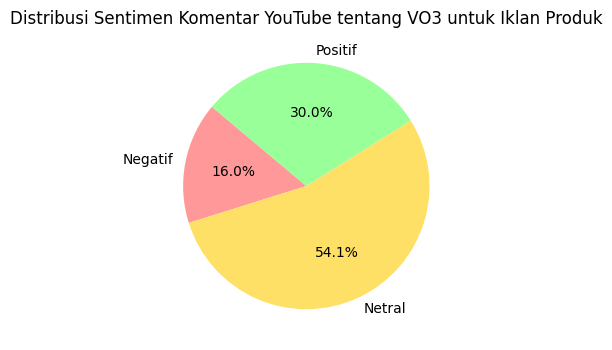

Selesai analisis dan simpan hasil sentimen.


In [4]:
# Baca komentar dari CSV dan lakukan analisis sentimen
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.nn.functional import softmax

# Pastikan model dan tokenizer sudah di-load di cell sebelumnya
try:
    tokenizer
    model
except NameError:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    model_name = "mdhugol/indonesia-bert-sentiment-classification"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

def analisis_sentimen(komentar):
    try:
        inputs = tokenizer(str(komentar), return_tensors="pt", truncation=True, max_length=256)
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1)
        label = torch.argmax(probs, dim=1).item()
        # Label: 0 = negative, 1 = neutral, 2 = positive
        return label, probs[0][label].item()
    except Exception as e:
        print(f"Error processing comment: {komentar}\n{e}")
        return None, None

# Baca data komentar
try:
    komentar_df = pd.read_csv("komentar_vo3.csv")
except Exception as e:
    print(f"Gagal membaca file CSV: {e}")
    komentar_df = pd.DataFrame(columns=["comment"])

# Analisis sentimen untuk setiap komentar
daftar_label = []
for komentar in komentar_df["comment"]:
    label, prob = analisis_sentimen(komentar)
    daftar_label.append(label)

komentar_df["sentiment"] = daftar_label

# Visualisasi hasil sentimen
try:
    total = komentar_df["sentiment"].value_counts().sort_index()
    labels = ["Negatif", "Netral", "Positif"]
    plt.figure(figsize=(6,4))
    plt.pie(total, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#ff9999","#ffe066","#99ff99"])
    plt.title("Distribusi Sentimen Komentar YouTube tentang VO3 untuk Iklan Produk")
    plt.show()
except Exception as e:
    print(f"Gagal membuat visualisasi: {e}")

# Simpan hasil ke CSV
try:
    komentar_df.to_csv("komentar_vo3_sentimen.csv", index=False)
    print("Selesai analisis dan simpan hasil sentimen.")
except Exception as e:
    print(f"Gagal menyimpan file hasil: {e}")

In [5]:
def analisis_sentimen(komentar):
    inputs = tokenizer(komentar, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    kelas = torch.argmax(probs).item()
    
    label = ["negatif", "netral", "positif"]
    return label[kelas], probs[0][kelas].item()


In [6]:
df = pd.read_csv("komentar_vo3.csv")

sentimen = []
confidence = []

for komentar in df['comment']:
    label, prob = analisis_sentimen(komentar)
    sentimen.append(label)
    confidence.append(prob)

df['sentimen'] = sentimen
df['kepercayaan'] = confidence

# Simpan hasil akhir
df.to_csv("komentar_vo3_sentimen.csv", index=False)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


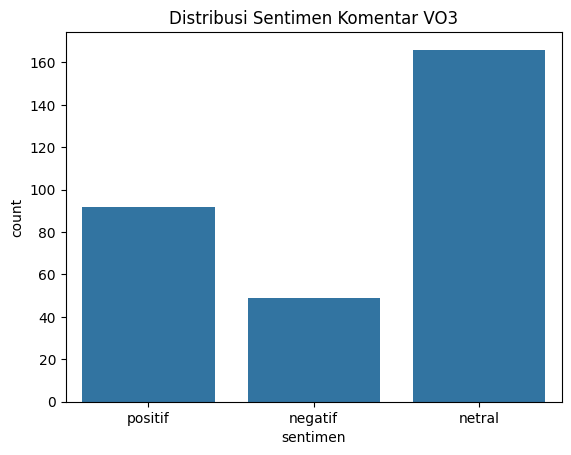

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="sentimen")
plt.title("Distribusi Sentimen Komentar VO3")
plt.show()